# Regresión Logística Simple

## Datos

In [1]:
import pandas as pd

In [2]:
path = r'~/Documents/GitHub/Supervisado/dataset/datos4.csv'
datos = pd.read_csv(path)

## Descripción de datos

In [3]:
datos.head()

,matricula,matematicas
0,0,41
1,0,53
2,0,54
3,0,47
4,0,57


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   matricula    200 non-null    int64
 1   matematicas  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [5]:
datos.describe()

,matricula,matematicas
count,200.000000,200.000000
mean,0.245000,52.645000
std,0.431166,9.368448
min,0.000000,33.000000
25%,0.000000,45.000000
50%,0.000000,52.000000
75%,0.000000,59.000000
max,1.000000,75.000000


In [6]:
# Número de obsercaciones por clase
# ==============================================================================
datos.matricula.value_counts().sort_index()

0    151
1     49
Name: matricula, dtype: int64

## Exploración gráfica

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [8]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

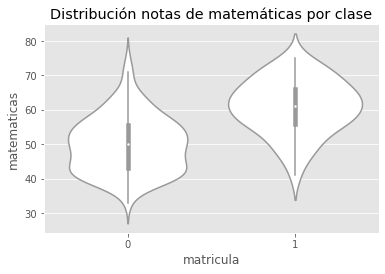

In [9]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'matricula',
        y     = 'matematicas',
        data  = datos,
        color = "white",
        ax    = ax
    )

ax.set_title('Distribución notas de matemáticas por clase');

In [10]:
from statsmodels.stats.weightstats import ttest_ind

In [11]:
# T-test entre clases
res_ttest = ttest_ind(
                x1 = datos.matematicas[datos.matricula == 0],
                x2 = datos.matematicas[datos.matricula == 1],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=-8.245421127756739, p-value=2.248243794123437e-14


Tanto el gráfico como el t-test muestran evidencias de que existe una diferencia entre la nota de las personas con matrícula y sin matrícula. Esta información es útil para considerar la nota de matemáticas como un buen predictor para el modelo.

## Preparación de los datos

Variable predictora

In [12]:
X = datos[['matematicas']].values.reshape(-1,1)

Escalado de la variable predictora

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_prepared = scaler.transform(X)

Variable predicha

In [15]:
y = datos['matricula'].values.reshape(-1,1).ravel()

División de los datos en train y test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X_prepared,
                                        y,
                                        train_size   = 0.9,
                                        random_state = 42,
                                        shuffle      = True
                                    )

## Ajuste del modelo

In [18]:
from sklearn.linear_model import LogisticRegression

Creación del modelo. Para no incluir ningún tipo de regularización en el modelo poner penalty='none'

In [19]:
model = LogisticRegression(penalty='none')
model.fit(X = X_train, y = y_train)

LogisticRegression(penalty='none')

Información del modelo

In [20]:
print("Intercepto:", model.intercept_)

Intercepto: [-1.4894821]


In [21]:
print("Coeficiente:", model.coef_.flatten())

Coeficiente: [1.4990685]


In [22]:
print("Accuracy de entrenamiento:", model.score(X, y))

Accuracy de entrenamiento: 0.245


Recta de regresión:

$y = -1.4894821+1.4990685*matematicas$

## Predicción de probabilidades

In [23]:
y_prob = model.predict_proba(X = X_test)
y_prob = pd.DataFrame(y_prob, columns = model.classes_)
y_prob.head(3)

,0,1
0,0.537237,0.462763
1,0.954204,0.045796
2,0.688020,0.311980


## Predicción de clases

In [24]:
y_class = model.predict(X = X_test)
y_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

## Predicción nueva

Nueva entrada

In [25]:
x_nueva = [[98]]

Estandarización de nueva entrada

In [26]:
x_nueva_prepared = scaler.transform(x_nueva)

Clase predicha

In [27]:
clase_predicha = model.predict(x_nueva_prepared)
clase_predicha

array([1], dtype=int64)

Probabilidad de pertencia

In [28]:
clase_predicha_prob =model.predict_proba(x_nueva_prepared)

In [29]:
print("Pr(matricula = 0|matematicas = 98) = %.4f" % clase_predicha_prob[0,0],",",
      "\nPr(matricula = 1|matematicas = 98) =%.4f" % clase_predicha_prob[0,1],".")

Pr(matricula = 0|matematicas = 98) = 0.0031 , 
Pr(matricula = 1|matematicas = 98) =0.9969 .


Elaborado por Jairo Rojas